In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
raw_data = pd.read_csv("/Users/meenakshirana/Desktop/new take off folder/data science study udemy/S36_L245/Bank-data.csv")
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [4]:
data = raw_data.copy()

In [5]:
data['y'] = data['y'].map({'yes':1,'no':0})

In [6]:
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [7]:
y = data['y']
x1 = data['duration']

In [10]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()


Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 May 2020   Pseudo R-squ.:                  0.2121
Time:                        14:37:55   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

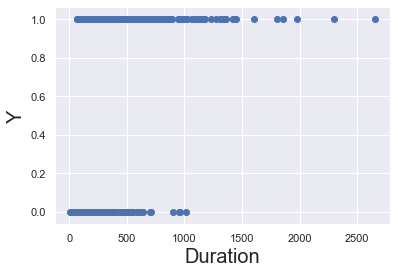

In [11]:
plt.scatter(x1,y,c = 'C0')
plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Y',fontsize = 20)
plt.show()

##odds of duration

In [12]:
np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression.
Note that we could have inferred that from the coefficient itself.
Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

In [13]:
result_log.predict()

array([0.24936904, 0.42571348, 0.30019503, 0.85898342, 0.28956627,
       0.2580803 , 0.21914028, 0.16614452, 0.86976608, 0.31987434,
       0.55276776, 0.22532533, 0.30234734, 0.39480294, 0.35411888,
       0.489064  , 0.29167414, 0.25225084, 0.50567672, 0.82802726,
       0.84413091, 0.5890681 , 0.45848474, 0.40215497, 0.44961416,
       0.20546539, 0.4157464 , 0.42321571, 0.58286683, 0.2580803 ,
       0.17928751, 0.2580803 , 0.85711543, 0.43322907, 0.293791  ,
       0.32658401, 0.98373368, 0.21652721, 0.99665611, 0.62920727,
       0.2639969 , 0.49417474, 0.30885632, 0.27711089, 0.28746746,
       0.2474601 , 0.19643708, 0.30342677, 0.30559213, 0.4712014 ,
       0.87376626, 0.20132396, 0.22177596, 0.28642146, 0.25612742,
       0.49417474, 0.27916371, 0.20214723, 0.88872861, 0.53501481,
       0.23806331, 0.24556099, 0.90211616, 0.40092648, 0.51078751,
       0.45975425, 0.28019361, 0.30450837, 0.87432905, 0.23713725,
       0.18231618, 0.3706541 , 0.4724754 , 0.38144917, 0.54009

In [14]:
np.set_printoptions(formatter = {'float': lambda x:"{0:0.2f}".format(x)})
result_log.predict()

array([0.25, 0.43, 0.30, 0.86, 0.29, 0.26, 0.22, 0.17, 0.87, 0.32, 0.55,
       0.23, 0.30, 0.39, 0.35, 0.49, 0.29, 0.25, 0.51, 0.83, 0.84, 0.59,
       0.46, 0.40, 0.45, 0.21, 0.42, 0.42, 0.58, 0.26, 0.18, 0.26, 0.86,
       0.43, 0.29, 0.33, 0.98, 0.22, 1.00, 0.63, 0.26, 0.49, 0.31, 0.28,
       0.29, 0.25, 0.20, 0.30, 0.31, 0.47, 0.87, 0.20, 0.22, 0.29, 0.26,
       0.49, 0.28, 0.20, 0.89, 0.54, 0.24, 0.25, 0.90, 0.40, 0.51, 0.46,
       0.28, 0.30, 0.87, 0.24, 0.18, 0.37, 0.47, 0.38, 0.54, 0.26, 0.41,
       0.57, 0.29, 0.21, 0.34, 0.43, 0.30, 0.46, 0.41, 0.97, 0.30, 0.53,
       0.40, 0.23, 0.36, 0.22, 0.37, 0.32, 0.77, 0.81, 0.80, 0.20, 0.98,
       0.30, 0.93, 0.34, 0.89, 0.41, 0.50, 0.50, 0.42, 0.35, 0.42, 0.52,
       0.54, 0.25, 0.31, 0.21, 0.74, 0.18, 0.25, 0.88, 0.60, 0.48, 0.23,
       0.17, 0.40, 0.99, 0.48, 0.96, 0.36, 0.59, 0.34, 0.42, 0.29, 0.33,
       0.48, 0.90, 0.46, 0.68, 0.57, 0.43, 0.43, 0.31, 0.26, 0.23, 0.84,
       0.44, 0.84, 0.65, 0.38, 0.26, 1.00, 0.26, 0.

In [15]:
np.array(data['y'])

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [16]:
result_log.pred_table()

array([[204.00, 55.00],
       [104.00, 155.00]])

In [17]:
cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


In [18]:
cm = np.array(cm_df)
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.693050193050193

In [23]:
test = pd.read_csv("/Users/meenakshirana/Desktop/new take off folder/data science study udemy/Bank_data_testing.csv")
test

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [24]:
test['y'] = test['y'].map({"no":0,"yes":1})
test

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [25]:
x

,const,duration
0,1.0,117.0
1,1.0,274.0
2,1.0,167.0
3,1.0,686.0
4,1.0,157.0
...,...,...
513,1.0,204.0
514,1.0,806.0
515,1.0,290.0
516,1.0,473.0


In [28]:
test_actual = test['y']
test_data = test.drop(['y','previous','may','march','credit','interest_rate','Unnamed: 0'],axis = 1)
test_data = sm.add_constant(test_data)
test_data

,const,duration
0,1.0,487.0
1,1.0,132.0
2,1.0,92.0
3,1.0,1468.0
4,1.0,36.0
...,...,...
217,1.0,458.0
218,1.0,397.0
219,1.0,34.0
220,1.0,233.0


In [30]:
def confusion_matrix(data,actual_values,model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

cm = confusion_matrix(test_data,test_actual,result_log)
cm

(array([[94.00, 17.00],
        [41.00, 70.00]]), 0.7387387387387387)

In [31]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index = {0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,94.0,17.0
Actual 1,41.0,70.0


In [32]:
print ("Misclassification rate: ",str((41+17)/(94+17+41+70)))

Misclassification rate:  0.26126126126126126
